In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import recruit_utils
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, kpss
from sklearn import cluster
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import Range1d
import seaborn as sns; sns.set(color_codes=True)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Import data into pandas data frames
data, stores = recruit_utils.import_data()

IndexingError: Too many indexers

In [3]:
train, test = recruit_utils.create_train_test(data, stores)

In [4]:
train.head()

,air_store_id,visit_date,visitors,log_visitors,dow,wom,year,month,day,visitor_diff,...,rv2_y,id,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_00a91d42b08b08d9,2016-07-01,35,3.555348,4,1,2016,7,1,-1.0,...,1.0,air_00a91d42b08b08d9_2016-07-01,-1.0,-1.0,-1.0,20160701,8.326629,4.519803,175.447598,0
1,air_00a91d42b08b08d9,2016-07-02,9,2.197225,5,1,2016,7,2,-26.0,...,-1.0,air_00a91d42b08b08d9_2016-07-02,-1.0,-1.0,-1.0,20160702,8.326629,4.519803,175.447598,0
2,air_00a91d42b08b08d9,2016-07-04,20,2.995732,0,1,2016,7,4,11.0,...,-1.0,air_00a91d42b08b08d9_2016-07-04,-1.0,-1.0,-1.0,20160704,8.326629,4.519803,175.447598,0
3,air_00a91d42b08b08d9,2016-07-05,25,3.218876,1,1,2016,7,5,5.0,...,-1.0,air_00a91d42b08b08d9_2016-07-05,-1.0,-1.0,-1.0,20160705,8.326629,4.519803,175.447598,0
4,air_00a91d42b08b08d9,2016-07-06,29,3.367296,2,1,2016,7,6,4.0,...,7.0,air_00a91d42b08b08d9_2016-07-06,-1.0,-1.0,-1.0,20160706,8.326629,4.519803,175.447598,0


In [1]:
list(train)

NameError: name 'train' is not defined

In [6]:
train.shape

(252108, 60)

In [7]:
test.head()

,id,visitors,visit_date,air_store_id,log_visitors,dow,wom,year,month,day,...,rs2_y,rv2_y,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,0,6,4,2017,4,23,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170423,8.326629,4.519803,175.447598,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,0,4,2017,4,24,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170424,8.326629,4.519803,175.447598,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,0,1,4,2017,4,25,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170425,8.326629,4.519803,175.447598,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,0,2,4,2017,4,26,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170426,8.326629,4.519803,175.447598,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,0,3,4,2017,4,27,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170427,8.326629,4.519803,175.447598,0


In [8]:
test.shape

(32019, 60)

In [9]:
tmp1 = train.copy()
tmp1['data_set'] = 'Train'
tmp2 = test.copy()
tmp2['data_set'] = 'Test'
combined = pd.concat([tmp1, tmp2])
del(tmp1)
del(tmp2)

In [10]:
import statsmodels.api as sm
X_outlier = train.drop(['visitors', 'log_visitors', 'visitor_diff', 'log_visitor_diff'], axis=1).values
y_outlier = train['log_visitors'].values
model = sm.OLS(X_outlier, y_outlier)

In [17]:
plot_df = combined.select_dtypes([np.int, np.float])

for i, col in enumerate(plot_df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=plot_df)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [12]:
categorical_vars = ['year', 'month', 'holiday_flg', 'air_genre_name', 'air_area_name', 'cluster']

In [16]:
for var in categorical_vars:
    plt.figure()
    sns.factorplot(x=var, col='data_set', data=combined, kind="count")

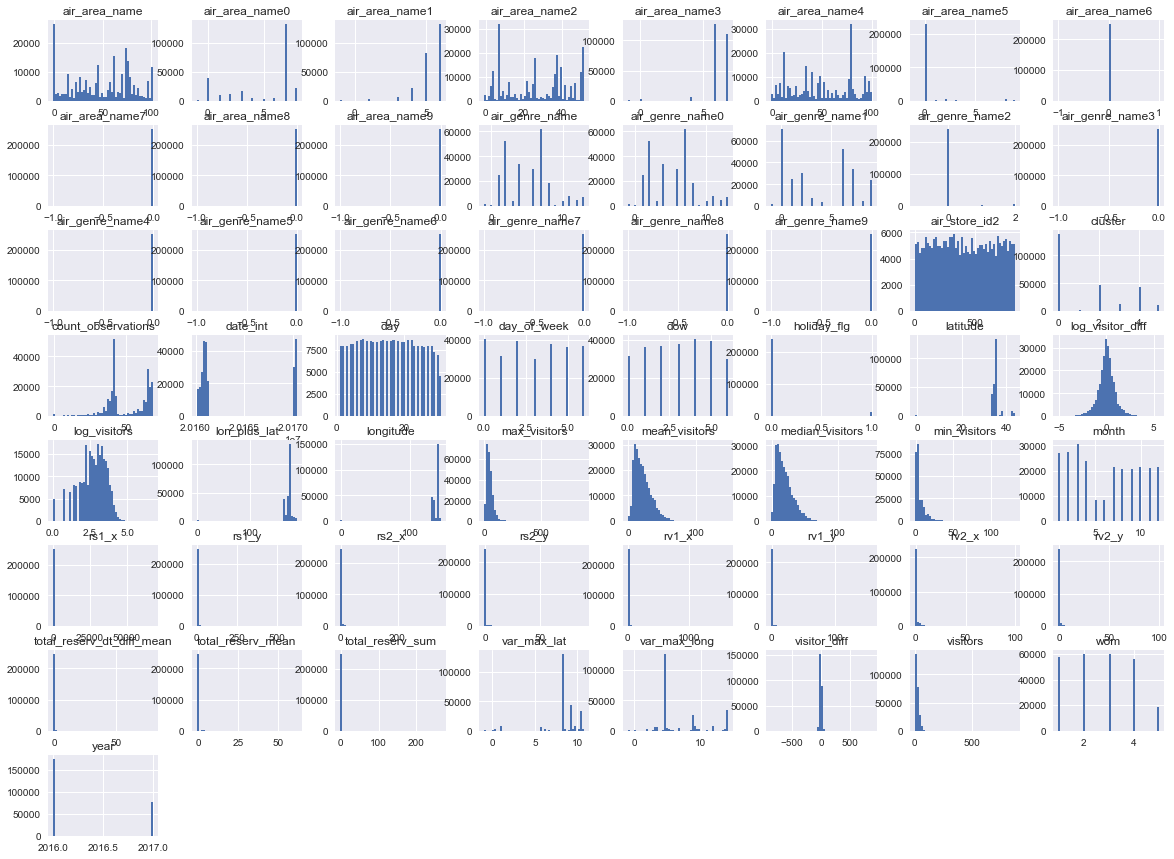

In [24]:
%matplotlib inline
train.hist(bins=50, figsize=(20, 15))
plt.show()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


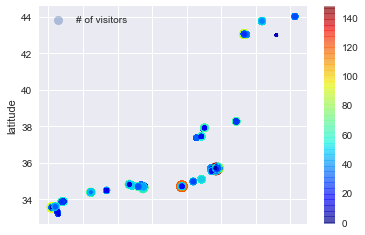

In [25]:
train.plot(kind="scatter", x="longitude", y="latitude", 
                              alpha=0.4, s=train["mean_visitors"], 
                              label="# of visitors", c=train["mean_visitors"], 
                              cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


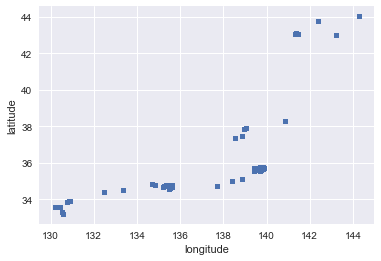

In [26]:
test.plot(kind="scatter", x="longitude", y="latitude", 
                              alpha=0.4)
plt.legend()

In [27]:
ts = pd.DataFrame(train[['visit_date', 'air_area_name', 'air_genre_name', 
                         'cluster', 'day_of_week', 'holiday_flg', 'visitors', 'visitor_diff', 'log_visitors', 'log_visitor_diff']])
ts = ts.set_index('visit_date')
ts.index = ts.index.to_datetime()
ts.index.name = 'visit_date'

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  after removing the cwd from sys.path.


In [28]:
ts = ts.sort_index()

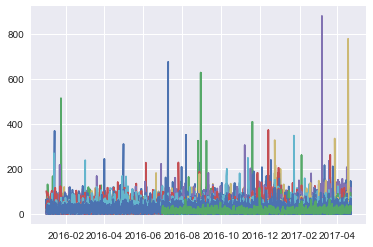

In [29]:
for area in np.unique(ts.air_area_name):
    plt.plot(ts[ts.air_area_name == area]['visitors'])

plt.show()

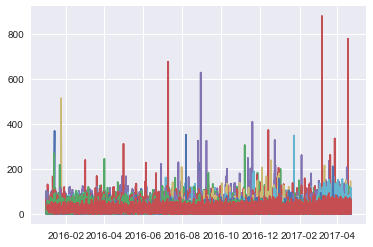

In [30]:
for genre in np.unique(ts.air_genre_name):
    plt.plot(ts[ts.air_genre_name == genre]['visitors'], label = genre)
    
plt.show()

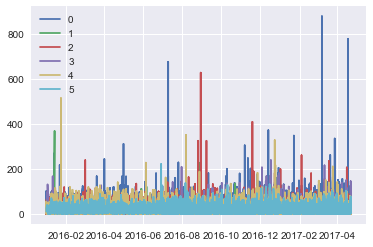

In [31]:
for clus in np.unique(ts.cluster):
    plt.plot(ts[ts.cluster == clus]['visitors'], label = clus)
    
plt.legend(loc='best')
plt.show()

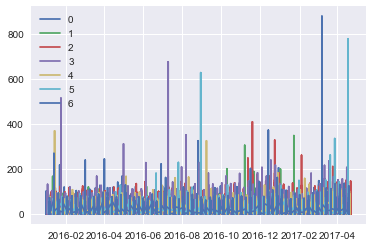

In [32]:
for dow in np.unique(ts.day_of_week):
    plt.plot(ts[ts.day_of_week == dow]['visitors'], label = dow)
    
plt.legend(loc='best')
plt.show()

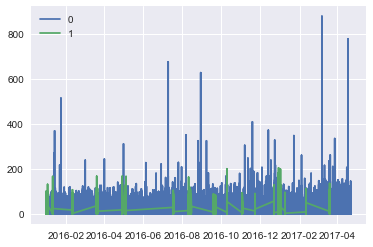

In [33]:
for hol in np.unique(ts.holiday_flg):
    plt.plot(ts[ts.holiday_flg == hol]['visitors'], label = hol)
    
plt.legend(loc='best')
plt.show()

In [34]:
ts = ts.groupby(ts.index).mean()
ts_dates = ts.index.to_series().as_matrix()
ts_visitors = ts.log_visitors.as_matrix()

window_size = 16
window = np.ones(window_size)/float(window_size)
ts_avg = np.convolve(ts_visitors, window, 'same')

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(ts_dates, ts_visitors, 
         size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(ts_dates, ts_avg, color='navy', legend='avg')

# NEW: customize by setting attributes
p.title.text = "Visitors 16 Day Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Visitors'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

In [35]:
ts = ts.groupby(ts.index).mean()
ts_dates = ts.index.to_series().as_matrix()
ts_visitors = ts.log_visitor_diff.as_matrix()

window_size = 16
window = np.ones(window_size)/float(window_size)
ts_avg = np.convolve(ts_visitors, window, 'same')

# create a new plot with a a datetime axis type
p = figure(width=800, height=350, x_axis_type="datetime")

# add renderers
p.circle(ts_dates, ts_visitors, 
         size=4, color='darkgrey', alpha=0.2, legend='close')
p.line(ts_dates, ts_avg, color='navy', legend='avg')

# NEW: customize by setting attributes
p.title.text = "Visitors 16 Day Average"
p.legend.location = "top_left"
p.grid.grid_line_alpha=0
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Visitors'
p.ygrid.band_fill_color="olive"
p.ygrid.band_fill_alpha = 0.1

# show the results
show(p)

In [36]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, label):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=14)
    rolstd = pd.rolling_std(timeseries, window=14)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[label], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).mean()
  
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).std()
  import sys


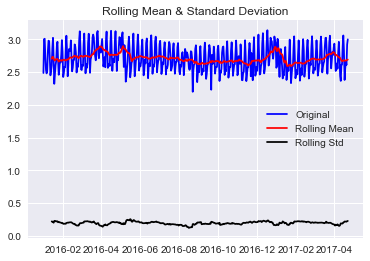

Results of Dickey-Fuller Test:
Test Statistic                  -3.336243
p-value                          0.013334
#Lags Used                      13.000000
Number of Observations Used    464.000000
Critical Value (1%)             -3.444522
Critical Value (5%)             -2.867789
Critical Value (10%)            -2.570099
dtype: float64


In [37]:
test_stationarity(ts[['log_visitors']], 'log_visitors')

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).mean()
  
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).std()
  import sys


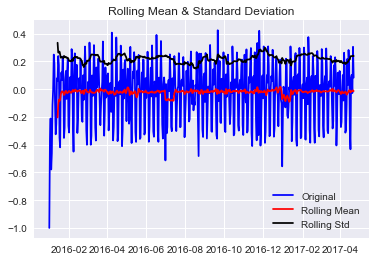

Results of Dickey-Fuller Test:
Test Statistic                -6.222681e+00
p-value                        5.177405e-08
#Lags Used                     1.800000e+01
Number of Observations Used    4.590000e+02
Critical Value (1%)           -3.444677e+00
Critical Value (5%)           -2.867857e+00
Critical Value (10%)          -2.570135e+00
dtype: float64


In [38]:
test_stationarity(ts[['log_visitor_diff']], 'log_visitor_diff')

In [39]:
for i in range(1, 26):
    print("KPSS test for lag = ", i, kpss(ts.log_visitors, lags=i))

KPSS test for lag =  1 (0.5495073167971084, 0.030516370090741346, 1, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  2 (0.53755490340092649, 0.03320835508988142, 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  3 (0.60209895023829219, 0.022445549978337073, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  4 (0.72373459305467913, 0.011387764267756442, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  5 (0.87432956900816605, 0.01, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  6 (0.89084725201173842, 0.01, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  7 (0.74604864506950819, 0.01, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  8 (0.62376599754298079, 0.020475818405183564, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  9 (0.56760545

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [40]:
for i in range(1, 26):
    print("KPSS test for lag = ", i, kpss(ts.log_visitor_diff, lags=i))

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


KPSS test for lag =  1 (0.095068958288188996, 0.1, 1, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  2 (0.11260143131712834, 0.1, 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  3 (0.13843179108546341, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  4 (0.17860619296425501, 0.1, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  5 (0.28199681542167609, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  6 (0.38289772610270256, 0.08452684219711096, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  7 (0.29304748184258406, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  8 (0.23000465212283719, 0.1, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  9 (0.22390577444910637, 0.1, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0

In [41]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(ts.log_visitors, lags=25)

(array([  105.98391918,   122.6047872 ,   183.37996644,   233.5483593 ,
          241.21478359,   327.15782863,   604.8641094 ,   660.98778059,
          682.21370755,   737.5080905 ,   784.7779757 ,   796.38329688,
          853.18517116,  1073.88300946,  1118.16010784,  1138.46838784,
         1197.44865089,  1253.29309753,  1269.43171448,  1315.96595501,
         1520.41265002,  1562.86363625,  1581.28934358,  1638.57519761,
         1698.3839182 ]),
 array([  7.43359915e-025,   2.38072225e-027,   1.64252297e-039,
          2.27336012e-049,   4.21395614e-050,   1.23116024e-067,
          2.18279919e-126,   1.78490192e-137,   4.60377306e-141,
          5.54131185e-152,   3.51150376e-161,   9.87001290e-163,
          5.55482108e-174,   2.16954089e-220,   6.11132529e-229,
          2.36974240e-232,   4.62170584e-244,   4.23734155e-255,
          1.25188083e-257,   1.12658685e-266,   1.46742017e-309,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+

In [42]:
acorr_ljungbox(ts.log_visitor_diff, lags=25)

(array([   23.61625731,    99.2411863 ,   117.55001228,   133.77556123,
          189.12232734,   211.83471986,   448.86482719,   461.88619788,
          527.32055414,   541.1345011 ,   554.73161407,   608.03264137,
          625.24281976,   831.55343781,   845.49770605,   898.15531954,
          912.26450945,   927.66760427,   983.20822075,   999.24695807,
         1204.77090024,  1219.85639918,  1267.39407665,  1281.06063547,
         1302.969958  ]),
 array([  1.17589841e-006,   2.81870876e-022,   2.60039357e-025,
          6.06453607e-028,   6.01744505e-039,   5.72505273e-043,
          7.78434285e-093,   1.04882710e-094,   8.08332828e-108,
          7.07082272e-110,   6.66069682e-112,   2.04112991e-122,
          3.17185789e-125,   1.96151319e-168,   1.60924478e-170,
          6.89727328e-181,   5.09858585e-183,   1.96090733e-185,
          2.03575448e-196,   5.65172324e-199,   5.60642360e-242,
          2.58071515e-244,   1.38149512e-253,   1.25750413e-255,
          1.97273150e-

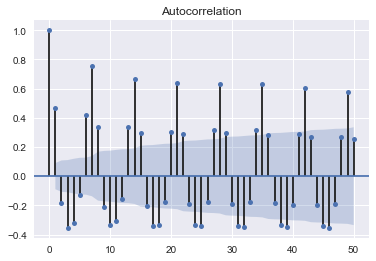

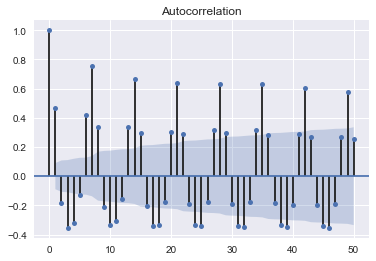

In [43]:
plot_acf(ts.log_visitors, lags=50)

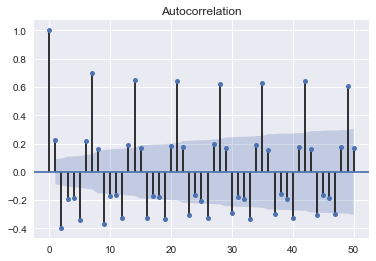

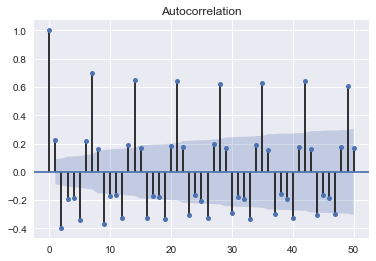

In [44]:
plot_acf(ts.log_visitor_diff, lags=50)

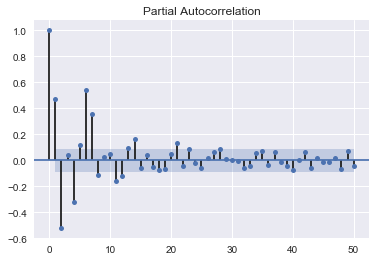

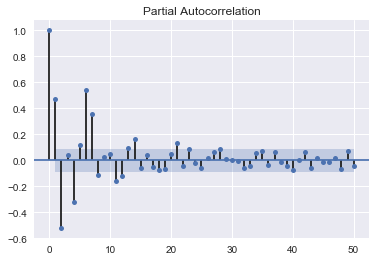

In [45]:
plot_pacf(ts.log_visitors, lags=50)

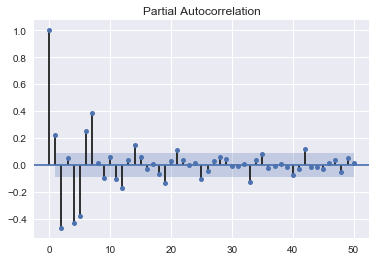

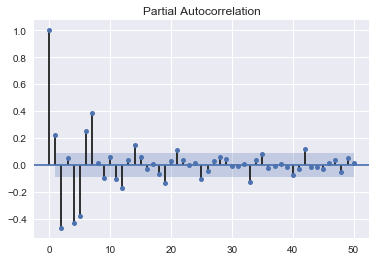

In [46]:
plot_pacf(ts.log_visitor_diff, lags=50)

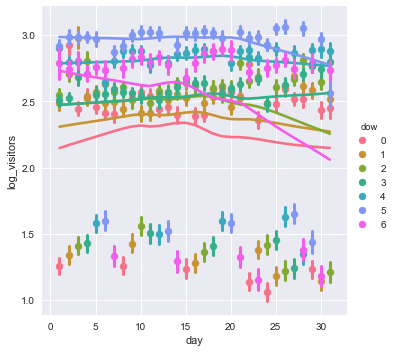

In [47]:
ax = sns.lmplot(x="day", y="log_visitors", x_estimator=np.mean, data=combined, hue="dow", lowess=True)

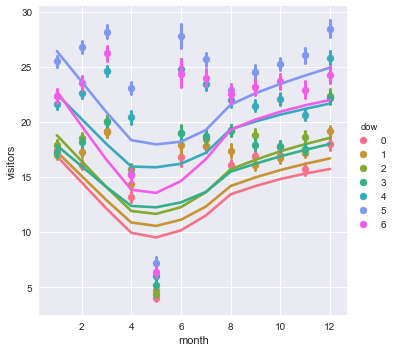

In [48]:
ax = sns.lmplot(x="month", y="visitors", x_estimator=np.mean, data=combined, hue="dow", lowess=True)

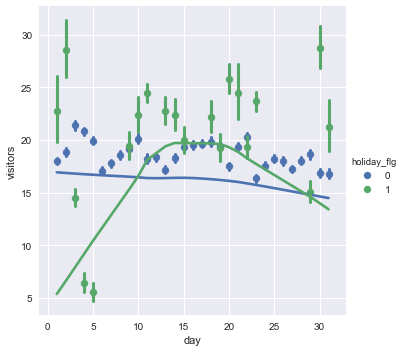

In [49]:
ax = sns.lmplot(x="day", y="visitors", x_estimator=np.mean, data=combined, hue="holiday_flg", lowess=True)

(0, 40)

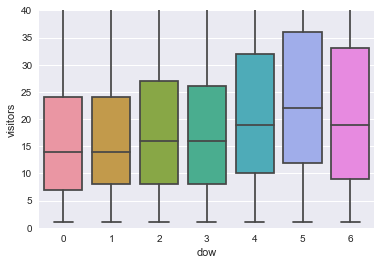

In [50]:
sns.boxplot(x="dow", y="visitors", data=train)

plt.ylim(0, 40)

(0, 40)

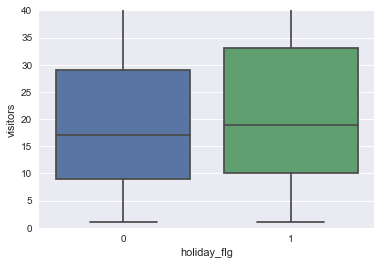

In [51]:
sns.boxplot(x="holiday_flg", y="visitors", data=train)

plt.ylim(0, 40)

(0, 100)

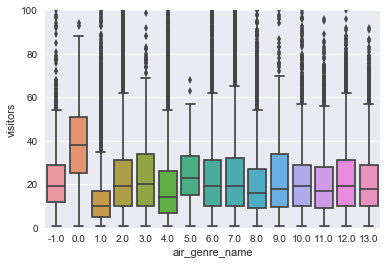

In [52]:
sns.boxplot(x="air_genre_name", y="visitors", data=train)

plt.ylim(0, 100)